# max_pool2d
torch.nn.MaxPool2d(
	kernel_size, 
	stride=None, 
	padding=0, 
	dilation=1, 
	return_indices=False, 
	ceil_mode=False)

最大池发现池中最大的数字

## 2. 参数解释
kernel_size (int or tuple)【必选】：max pooling 的窗口大小，当最大池化窗口是方形的时候，只需要一个整数边长即可；最大池化窗口不是方形时，要输入一个元组表 高和宽。

stride (int or tuple, optional)【可选】：max pooling 的窗口移动的步长。默认值是 kernel_size

padding (int or tuple, optional)【可选】：输入的每一条边补充0的层数

dilation (int or tuple, optional)【可选】：一个控制窗口中元素步幅的参数

return_indices (bool)【可选】：如果等于 True，会返回输出最大值的序号，对于上采样操作会有帮助

ceil_mode (bool)【可选】：如果等于True，计算输出信号大小的时候，会使用向上取整，代替默认的向下取整的操作
 

最大池化操作理论分析
给定如下输入图像及相应池化核，则输出结果为？

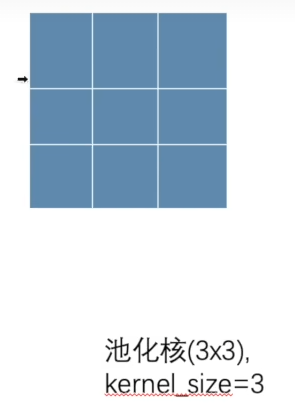    

首先进行第一步匹配，如下图所示。

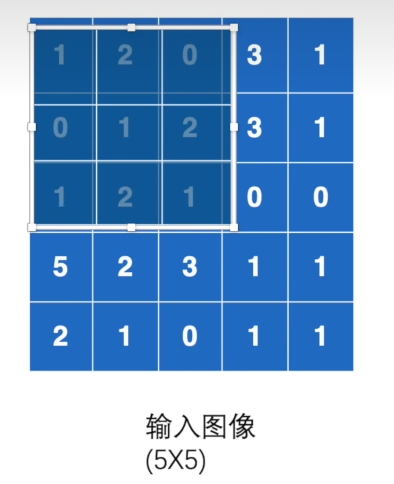       

       最大池化操作的过程是，在匹配后的框中寻找最大的数。经对比，可知最大数为2，则第一步结果为：
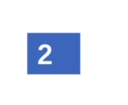
 

第二步匹配结果如下图所示。（假设stride取值为默认值，即池化核的尺寸大小，则池化核需要移动三个步长）
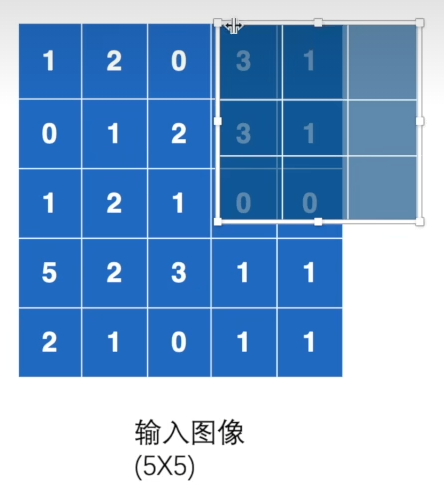
      

 此时得到的结果需要取决于参数ceil_mode的取值，结果如下所示：（注：ceil_mode=True 即为保留；ceil_mode=False 即为舍弃）

 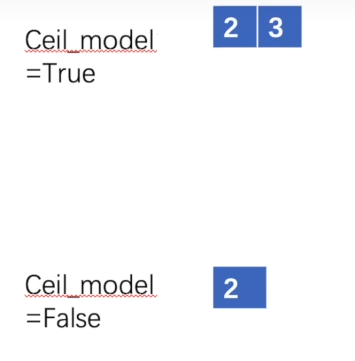      

下一步结果为：
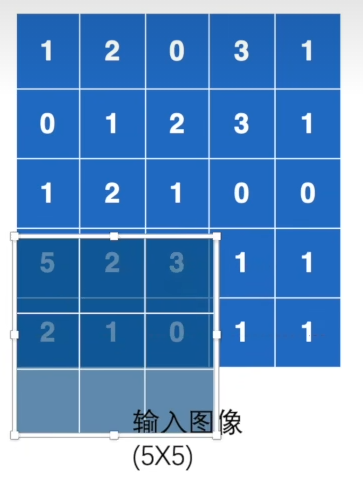
   

 在下一步结果为：

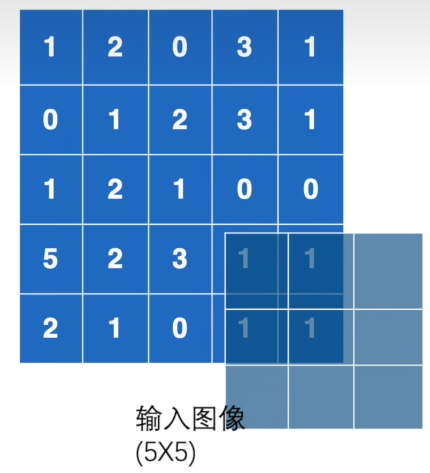

上右图也即为最终池化后的结果。
 

In [1]:
import torch
# 输入图像信息
from torch import nn
from torch.nn import MaxPool2d
 
input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]], dtype=torch.float)
input = torch.reshape(input, (-1, 1, 5, 5)) # -1表示自动计算batch_size的大小
# print(input.shape)
 
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=True)
 
    def forward(self, input):
        output = self.maxpool1(input)
        return output
 
tudui = Tudui() # 创建神经网络
output = tudui(input)
print(output)
 

tensor([[[[2., 3.],
          [5., 1.]]]])
